# STA 208: Homework 3
This is based on the material in Chapter 4 of 'Elements of Statistical Learning' (ESL), in addition to lectures 7-8.  Chunzhe Zhang came up with the dataset and the analysis in the second section.

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements (beginning with __Exercise X.X__).  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

In the conceptual exercises you should provide an explanation, with math when necessary, for any answers.  When answering with math you should use basic LaTeX, as in 
$$E(Y|X=x) = \int_{\mathcal{Y}} f_{Y|X}(y|x) dy = \int_{\mathcal{Y}} \frac{f_{Y,X}(y,x)}{f_{X}(x)} dy$$
for displayed equations, and $R_{i,j} = 2^{-|i-j|}$ for inline equations.  (To see the contents of this cell in markdown, double click on it or hit Enter in escape mode.)  To see a list of latex math symbols see here: http://web.ift.uib.no/Teori/KURS/WRK/TeX/symALL.html

When writing pseudocode, you should use enumerated lists, such as 

__Algorithm: Ordinary Least Squares Fit__
(Input: X, y; 
Output: $\beta$)
1. Initialize the $p \times p$ Gram matrix, $G \gets 0$, and the vector $b \gets 0$.
2. For each sample, $x_i$:
 1. $G \gets G + x_i x_i^\top$.
 2. $b \gets b + y_i x_i$
3. Solve the linear system $G \beta = b$ and return $\beta$


__Exercise 1.1__ (10 pts - 2 each)

Recall that surrogate losses for large margin classification take the form, $\phi(y_i x_i^\top \beta)$ where $y_i \in \{-1,1\}$ and $\beta, x_i \in \mathbb R^p$.

The following functions are used as surrogate losses for large margin classification.  Demonstrate if they are convex or not, and follow the instructions.

1. exponential loss: $\phi(x) = e^{-x}$
1. truncated quadratic loss: $\phi(x) = (\max\{1-x,0\})^2$
1. hinge loss: $\phi(x) = \max\{1-x,0\}$
1. sigmoid loss: $\phi(x) = 1 - \tanh(\kappa x)$, for fixed $\kappa > 0$
1. Plot these as a function of $x$.

(This problem is due to notes of Larry Wasserman.) 


__Exercise 1.1__
1. For exponential loss: $\frac{\partial^2 \phi(x)}{\partial{x^2}}=e^{-x}>0,\forall x$.
So exponential loss: $\phi(x) = e^{-x}$ is convex.

2. For truncated quadratic loss: the first-order derivative of loss function is smooth and continous at $x=1$.Therefore, for $x\geq1$,$\frac{\partial^2 \phi(x)}{\partial x^2}=0$; for for $x<1$,$\frac{\partial^2 \phi(x)}{\partial x^2}=2$. So in general, $\frac{\partial^2 \phi(x)}{\partial x^2}\geq0$. So truncated quadratic loss: $\phi(x) = (\max\{1-x,0\})^2$ is convex.

3. For hinge loss, given $f(x)=1-x$ and $g(x)=0$. It is easy to see that both $f(x)$ and $g(x)$ are convex, since they are twice differentiable function of $x$ and their second derivative is 0, which is non-negative. Therefore, $\phi(x)=max{f(x),g(x)}$ is also convex. So
hinge loss: $\phi(x) = \max\{1-x,0\}$ is convex.

4. For sigmoid loss:$\frac{\partial^2 \phi(x)}{\partial{x^2}}=2\tanh ^3(x)-2\tanh(x)$, which is not always non-negative. So sigmoid loss: $\phi(x) = 1 - \tanh(\kappa x)$, for fixed $\kappa > 0$ is not convex.

5. plot the above $4$ functions of $x$: 

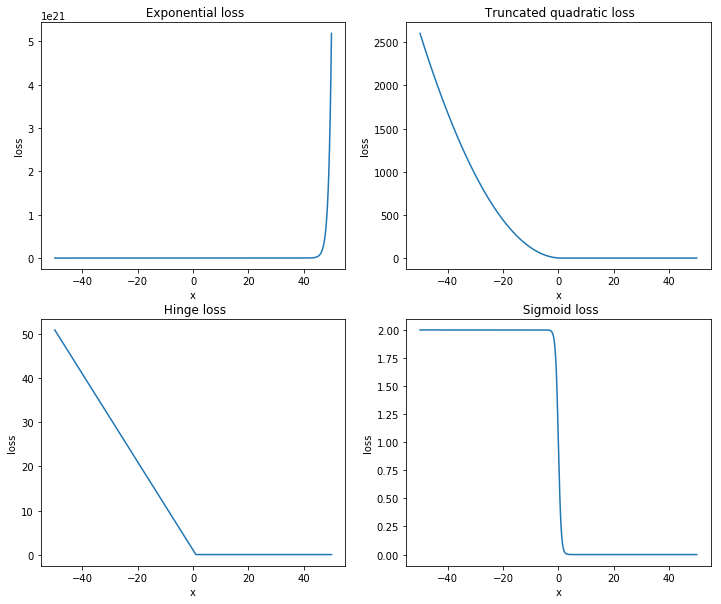

In [116]:

figure,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(12,10))
x=np.linspace(-50,50,num=401)
y1=np.exp(x)
y0=np.zeros(len(x))
y2=(np.maximum(1-x,y0))**2
y3=(np.maximum(1-x,y0))
y4=1-np.tanh(1*x)
ax1.plot(x,y1)
ax1.set_xlabel('x')
ax1.set_ylabel('loss')
ax1.set_title(' Exponential loss')
ax2.plot(x,y2)
ax2.set_xlabel('x')
ax2.set_ylabel('loss')
ax2.set_title(' Truncated quadratic loss')
ax3.plot(x,y3)
ax3.set_xlabel('x')
ax3.set_ylabel('loss')
ax3.set_title(' Hinge loss')
ax4.plot(x,y4)
ax4.set_xlabel('x')
ax4.set_ylabel('loss')
ax4.set_title(' Sigmoid loss')

figure



__Exercise 1.2__ (10 pts)

Consider the truncated quadratic loss from (1.1.2).  For brevity let $a_+ = max\{a,0\}$ denote the positive part of $a$.

$$\ell(y_i,x_i,\beta) = \phi(y_i x_i^\top \beta) = (1-y_i x_i^\top \beta)_+^2$$

1. Consider the empirical risk, $R_n$ (the average loss over a training set) for the truncated quadratic loss.  What is gradient of $R_n$ in $\beta$?  Does it always exists?
1. Demonstrate that the gradient does not have continuous derivative everywhere.
1. Recall that support vector machines used the hinge loss $(1 - y_i x_i^\top)_+$ with a ridge regularization.  Write the regularized optimization method for the truncated quadratic loss, and derive the gradient of the regularized empirical risk.
1. Because the loss does not have continuous Hessian, instead of the Newton method, we will use a quasi-Newton method that replaces the Hessian with a quasi-Hessian (another matrix that is meant to approximate the Hessian).  Consider the following quasi-Hessian of the regularized objective to be $$G(\beta) = \frac 1n \sum_i 2 (x_i x_i^\top 1\{ y_i x_i^\top \beta > 1 \}) + 2 \lambda.$$  Demonstrate that the quasi-Hessian is positive definite, and write pseudo-code for quasi-Newton optimization.  (There was a correction in the lectures, that when minimizing a function you should subtract the gradient $\beta \gets \beta - H^{-1} g$).

__Exercise 1.2__
1. The empirical risk $R_n$ here can be written as:$$R_n=\frac{1}{n}\sum_i(1-y_ix_i^T\beta)_+^2$$
Then the gradient of $R_n$ in $\beta$ is:$$\nabla R_n=2\frac{1}{n}\sum_i(-y_ix_i)(1-y_ix_i^T\beta)_+$$
It always exists.when $y_ix_i^T\beta<1$,$\nabla R_n=2\frac{1}{n}\sum_i(-y_ix_i)(1-y_ix_i^T\beta)$;
$\nabla R_n=0$ otherwise. 

2.As we know $$\nabla R_n=2\frac{1}{n}\sum_i(-y_ix_i)(1-y_ix_i^T\beta)_+$$ It takes a breakpoint when $y_ix_i^T\beta=1$. Then $\nabla^2 R_n$ would have two different values at $y_ix_i^T\beta=1$. So $\nabla^2 R_n$ is not continous when $y_ix_i^T\beta=1$,i.e., $\nabla R_n$ does not have continuous derivative everywhere.

3.The regularized optimaztion method for the truncated quadratic loss can be written as:
$$ R_n=\frac{1}{n}\sum_i (1-y_ix_i^T\beta)_+^2+\lambda\|\beta\|^2$$
The gradient of the regularized empirical risk is:$$\nabla R_n=2\frac{1}{n}\sum_i(-y_ix_i)(1-y_ix_i^T\beta)_++2\lambda\beta$$

4.

$\forall\alpha\ne0,\alpha\in R^p$,$$\alpha^TG(\beta)\alpha=\frac{2}{n}\sum_i(\alpha^Tx_ix_i^T\alpha1\{y_ix_i^T\beta>1\})+2\lambda\alpha^T\alpha>0$$
So the quasi-Hessian,$G(\beta)$is positive definite.

As $\beta \gets \beta-H^{-1}g$, here $H$ is replaced by $G$, then the psedo-code can be:
quasi-Newton optimization (input:$X,y,\lambda$,output:$\beta$):
    
Step 1.Set inital guess of $\beta^{(n)}$,calculate the quasi-Hessian $G(\beta)$;
    
Step 2.Calculate the gradient of $G$,denoted as $g$.
    
Step 3.Solve the linear system $GS=g$ get $S$.
    
Step 4.Update $\beta$ as: $\beta \gets \beta-S$, where $S=G^{-1}g$

Step 5.Repeat $2-4$ until convergence is reached.

# HW3 Logistic, LDA, SVM

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
# dataset path
data_dir = "."

The following code reads the data, subselects the $y$ and $X$ variables, and makes a training and test split.  This is the Abalone dataset and we will be predicting the age. V9 is age, 1 represents old, 0 represents young. 

In [2]:
sample_data = pd.read_csv(data_dir+"/hw3.csv", delimiter=',')
sample_data.V1=sample_data.V1.factorize()[0]

X = np.array(sample_data.iloc[:,range(0,8)])
y = np.array(sample_data.iloc[:,8])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

__Exercise 2.1__ (10 pts) Perform logistic regression using Newton conjugate gradient.  You should save the predicted probabilities, and save the roc and pr curves (using roc_curve and precision_recall_curve) computed using the test set.

In [3]:
sample_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0


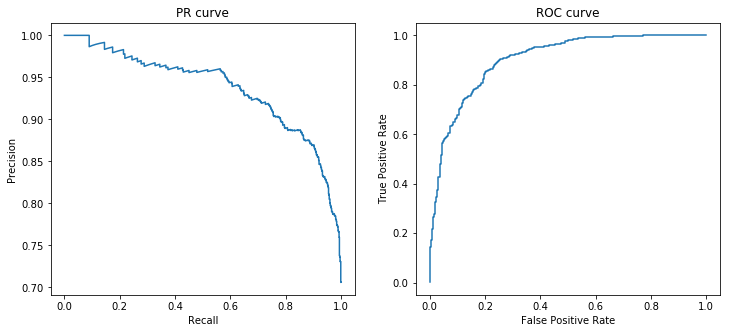

In [81]:
# logistic regression using newton conjugate gradient
lgm= skl_lm.LogisticRegression(solver='newton-cg')

lgm.fit(X_train,y_train)
prob = lgm.predict_proba(X_test) # save the probability for logistic regression
y_pred_1=lgm.predict(X_test)

y_pred1=prob[:,1]
# creating plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
# Left plot
preci1,rec1,thre1=precision_recall_curve(y_test,y_pred1)# PR curve information
ax1.plot(rec1,preci1)
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('PR curve')

# Right plot
fpr1,tpr1,threshold1=roc_curve(y_test,y_pred1)# ROC curve information
ax2.plot(fpr1,tpr1)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC curve')

fig

__Exercise 2.2__ (10 pts) Do the same for linear discriminant analysis.

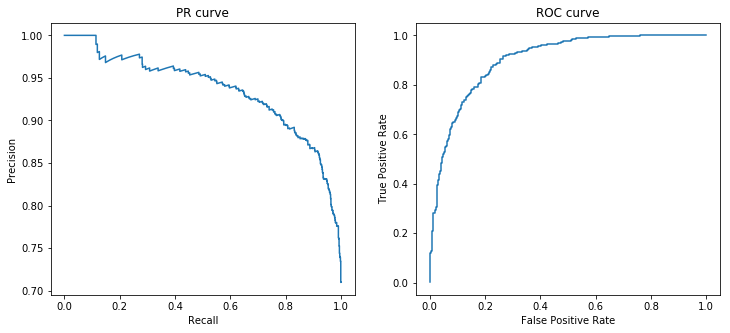

In [78]:
lda = LinearDiscriminantAnalysis(solver='svd')
y_pred_2 = lda.fit(X_train, y_train).predict(X_test)

prob2 = lda.predict_proba(X_test)# save the probability for linear discriminant analysis

y_pred2=prob2[:,1]
# creating plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
# Left plot
preci2,rec2,thre2=precision_recall_curve(y_test,y_pred2) # PR curve information
ax1.plot(rec2,preci2)
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('PR curve')

# Right plot
fpr2,tpr2,threshold2=roc_curve(y_test,y_pred2)# ROC curve information
ax2.plot(fpr2,tpr2)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC curve')

fig


__Exercise 2.3__ (10 pts) Do the same for support vector machines.

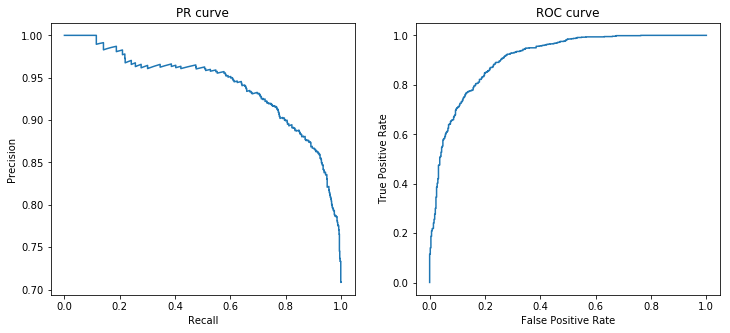

In [79]:
sv = SVC(kernel='linear',probability=True)
y_pred_3 = sv.fit(X_train, y_train).predict(X_test)

prob3 =sv.predict_proba(X_test) # save the probability for SVM

y_pred3=prob3[:,1]
# creating plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
# Left plot
preci3,rec3,thre3=precision_recall_curve(y_test,y_pred3) # PR curve information
ax1.plot(rec3,preci3)
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('PR curve')

# Right plot
fpr3,tpr3,threshold3=roc_curve(y_test,y_pred3) # ROC curve information
ax2.plot(fpr3,tpr3)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC curve')

fig

__Exercise 2.4__ (10 pts) Plot and compare the ROC and PR curves for the above methods.

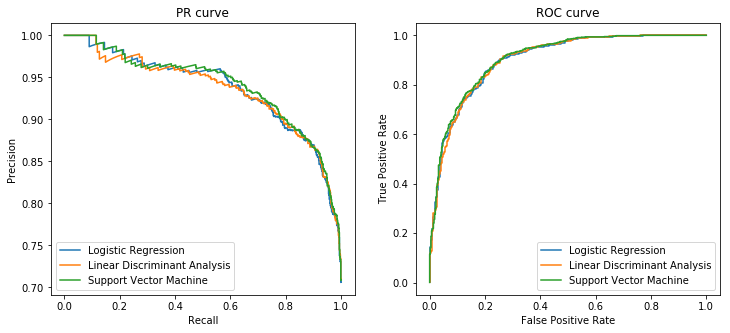

In [80]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
# left plot
ax1.plot(rec1,preci1,label='Logistic Regression')
ax1.plot(rec2,preci2,label='Linear Discriminant Analysis')
ax1.plot(rec3,preci3,label='Support Vector Machine')

ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('PR curve')

ax1.legend(loc=0)

# Right plot
ax2.plot(fpr1,tpr1,label='Logistic Regression')
ax2.plot(fpr2,tpr2,label='Linear Discriminant Analysis')
ax2.plot(fpr3,tpr3,label='Support Vector Machine')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC curve')
ax2.legend(loc=0)

fig

The figure above shows the PR curves and ROC curves obtained by Logisitc Regression (LR), Linear Discriminant Analysis(LDA) and Support Vector Machine (SVM). It can be easily seen that the results by these three methods are very similar, especially for LR and SVM are almost the same, only of negligible difference. The reason is that LR,LDA and SVM( with linear kernal) indeed have a similiar model formulation based on linear models. LR and SVM can be applied to data with flexible distribution, i.e.,  they are not restricted to normal distribution. However, LDA requires the normal distribution assumption of the underlying data distribtuion.